In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
pranavuikey_black_friday_sales_eda_path = kagglehub.dataset_download('pranavuikey/black-friday-sales-eda')

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/black-friday-sales-eda/train.csv


In [ ]:
df = pd.read_csv('/kaggle/input/black-friday-sales-eda/train.csv')
df


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


# DATA PREPROCESSING



In [ ]:
# Check basic statistics of dataset

print('Original DataFrame:')
df.describe()



Original DataFrame:


,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [ ]:
#Check if duplicates are present or not
df[df.duplicated()=='True'] # No Duplicates

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase


In [ ]:
#Number of Unique Values in each column
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [ ]:
#Check missing values or NUll Values
df.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

Product_Category_1 and Product_Category_2 Has max number os missing values

In [ ]:
df['Product_Category_2']

0          NaN
1          6.0
2          NaN
3         14.0
4          NaN
          ... 
550063     NaN
550064     NaN
550065     NaN
550066     NaN
550067     NaN
Name: Product_Category_2, Length: 550068, dtype: float64

In [ ]:
df['Product_Category_2'].fillna(0, inplace = True)
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,0.0,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,0.0,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,0.0,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,0.0,NaN,365


In [ ]:
df['Product_Category_3']

0          NaN
1         14.0
2          NaN
3          NaN
4          NaN
          ... 
550063     NaN
550064     NaN
550065     NaN
550066     NaN
550067     NaN
Name: Product_Category_3, Length: 550068, dtype: float64

In [ ]:
df['Product_Category_3'].fillna(0, inplace=True)
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,0.0,0.0,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,0.0,0.0,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,0.0,0.0,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,0.0,0.0,365


In [ ]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [ ]:
df['Age'].value_counts()


Age
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: count, dtype: int64

In [ ]:
df['Age'].dtype


dtype('O')

In [ ]:
df['Marital_Status']=df['Marital_Status'].replace({0:"Unmarried", 1:'Married'})
df['Marital_Status']


0         Unmarried
1         Unmarried
2         Unmarried
3         Unmarried
4         Unmarried
            ...    
550063      Married
550064    Unmarried
550065      Married
550066    Unmarried
550067      Married
Name: Marital_Status, Length: 550068, dtype: object

In [ ]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,Unmarried,3,0.0,0.0,8370
1,1000001,P00248942,F,0-17,10,A,2,Unmarried,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,Unmarried,12,0.0,0.0,1422
3,1000001,P00085442,F,0-17,10,A,2,Unmarried,12,14.0,0.0,1057
4,1000002,P00285442,M,55+,16,C,4+,Unmarried,8,0.0,0.0,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,Married,20,0.0,0.0,368
550064,1006035,P00375436,F,26-35,1,C,3,Unmarried,20,0.0,0.0,371
550065,1006036,P00375436,F,26-35,15,B,4+,Married,20,0.0,0.0,137
550066,1006038,P00375436,F,55+,1,C,2,Unmarried,20,0.0,0.0,365


In [ ]:
df['Age']=df['Age'].str.replace('+',' ')
df['Age']

0          0-17
1          0-17
2          0-17
3          0-17
4           55 
          ...  
550063    51-55
550064    26-35
550065    26-35
550066      55 
550067    46-50
Name: Age, Length: 550068, dtype: object

In [ ]:
df['Age']=df['Age'].str.replace("51|0\-|26|46|36|18|-",' ', regex=True)
df['Age']

0           17
1           17
2           17
3           17
4          55 
          ... 
550063      55
550064      35
550065      35
550066     55 
550067      50
Name: Age, Length: 550068, dtype: object

In [ ]:
df['Age']=df['Age'].astype(int)
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,17,10,A,2,Unmarried,3,0.0,0.0,8370
1,1000001,P00248942,F,17,10,A,2,Unmarried,1,6.0,14.0,15200
2,1000001,P00087842,F,17,10,A,2,Unmarried,12,0.0,0.0,1422
3,1000001,P00085442,F,17,10,A,2,Unmarried,12,14.0,0.0,1057
4,1000002,P00285442,M,55,16,C,4+,Unmarried,8,0.0,0.0,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,55,13,B,1,Married,20,0.0,0.0,368
550064,1006035,P00375436,F,35,1,C,3,Unmarried,20,0.0,0.0,371
550065,1006036,P00375436,F,35,15,B,4+,Married,20,0.0,0.0,137
550066,1006038,P00375436,F,55,1,C,2,Unmarried,20,0.0,0.0,365


In [ ]:
df['Occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6])

In [ ]:
df['Occupation']=df['Occupation'].replace({0:'-'})
df['Occupation']

0         10
1         10
2         10
3         10
4         16
          ..
550063    13
550064     1
550065    15
550066     1
550067     -
Name: Occupation, Length: 550068, dtype: object

In [ ]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,17,10,A,2,Unmarried,3,0.0,0.0,8370
1,1000001,P00248942,F,17,10,A,2,Unmarried,1,6.0,14.0,15200
2,1000001,P00087842,F,17,10,A,2,Unmarried,12,0.0,0.0,1422
3,1000001,P00085442,F,17,10,A,2,Unmarried,12,14.0,0.0,1057
4,1000002,P00285442,M,55,16,C,4+,Unmarried,8,0.0,0.0,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,55,13,B,1,Married,20,0.0,0.0,368
550064,1006035,P00375436,F,35,1,C,3,Unmarried,20,0.0,0.0,371
550065,1006036,P00375436,F,35,15,B,4+,Married,20,0.0,0.0,137
550066,1006038,P00375436,F,55,1,C,2,Unmarried,20,0.0,0.0,365


In [ ]:
df['Purchase'].unique()

array([ 8370, 15200,  1422, ...,   135,   123,   613])

In [ ]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [ ]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+', '')
df['Stay_In_Current_City_Years']

0         2
1         2
2         2
3         2
4         4
         ..
550063    1
550064    3
550065    4
550066    2
550067    4
Name: Stay_In_Current_City_Years, Length: 550068, dtype: object

In [ ]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,17,10,A,2,Unmarried,3,0.0,0.0,8370
1,1000001,P00248942,F,17,10,A,2,Unmarried,1,6.0,14.0,15200
2,1000001,P00087842,F,17,10,A,2,Unmarried,12,0.0,0.0,1422
3,1000001,P00085442,F,17,10,A,2,Unmarried,12,14.0,0.0,1057
4,1000002,P00285442,M,55,16,C,4,Unmarried,8,0.0,0.0,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,55,13,B,1,Married,20,0.0,0.0,368
550064,1006035,P00375436,F,35,1,C,3,Unmarried,20,0.0,0.0,371
550065,1006036,P00375436,F,35,15,B,4,Married,20,0.0,0.0,137
550066,1006038,P00375436,F,55,1,C,2,Unmarried,20,0.0,0.0,365


## Data Visulization

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Marital_Status = df['Marital_Status'].value_counts()
print(Marital_Status)


Marital_Status
Unmarried    324731
Married      225337
Name: count, dtype: int64


### 1. visualize individul column


<Axes: xlabel='Marital_Status'>

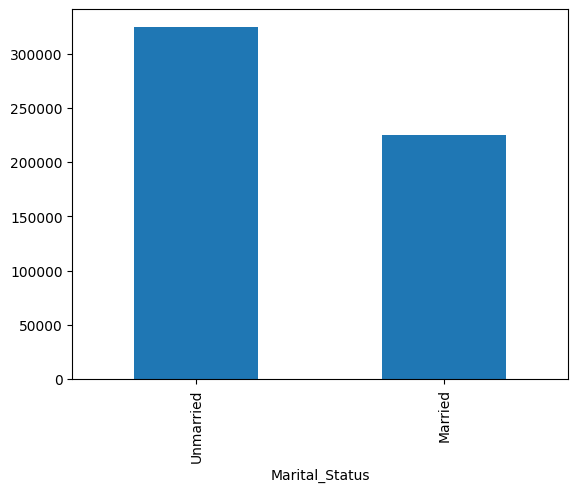

In [ ]:
# Marital_Status column
df['Marital_Status'].value_counts().plot(kind='bar')

<Axes: xlabel='Marital_Status', ylabel='count'>

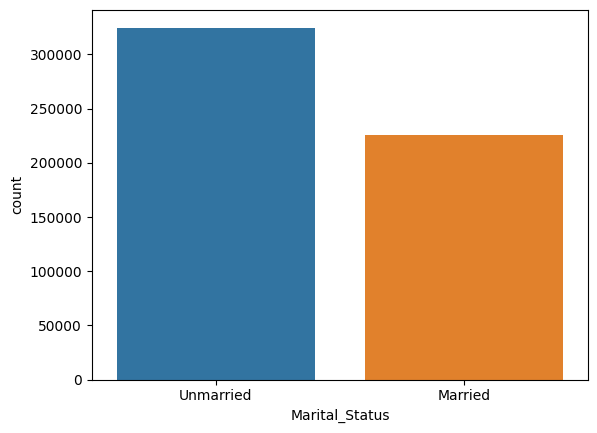

In [ ]:
###SNS
sns.countplot(x='Marital_Status', data=df)


<Axes: xlabel='Gender'>

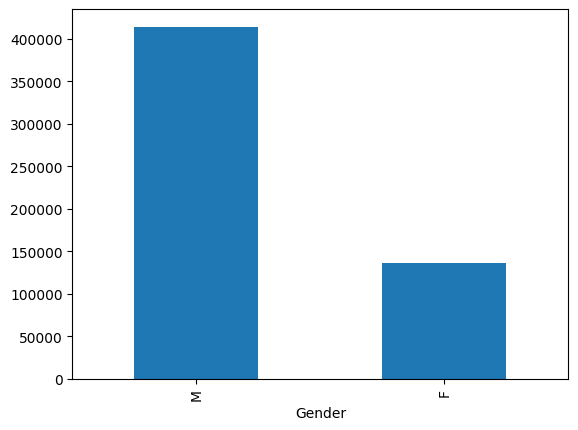

In [ ]:
# Gender Column
df['Gender'].value_counts().plot(kind='bar')

<Axes: xlabel='Gender', ylabel='count'>

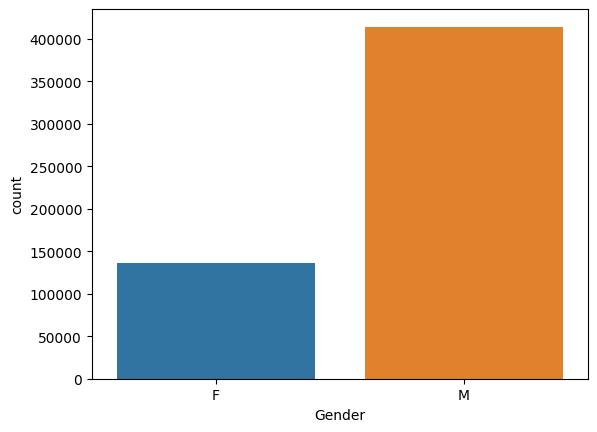

In [ ]:
###SNS
sns.countplot(x='Gender', data=df)

<Axes: xlabel='Age'>

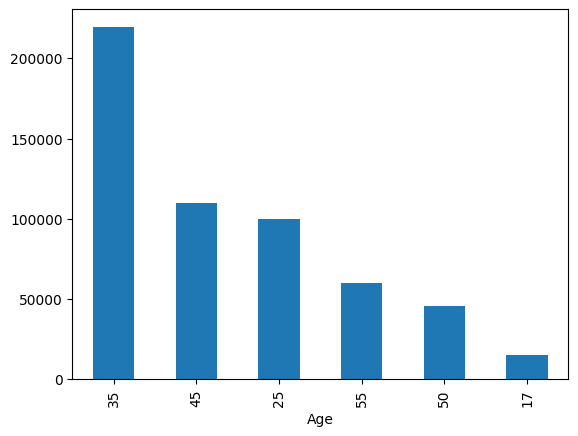

In [ ]:
# Age Column
df['Age'].value_counts().plot(kind='bar')

<Axes: xlabel='Age', ylabel='count'>

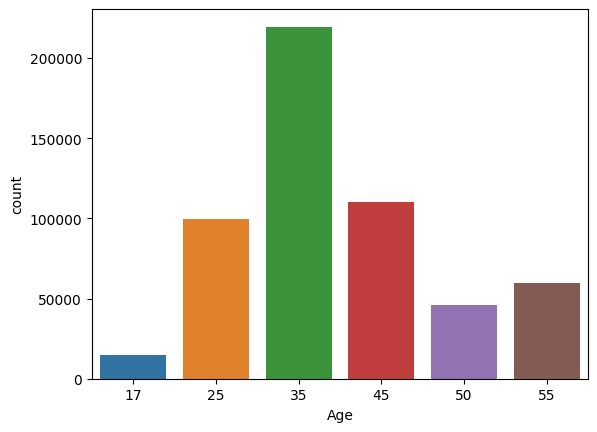

In [ ]:
###SNS
sns.countplot(x = 'Age', data=df)

<Axes: xlabel='Purchase'>

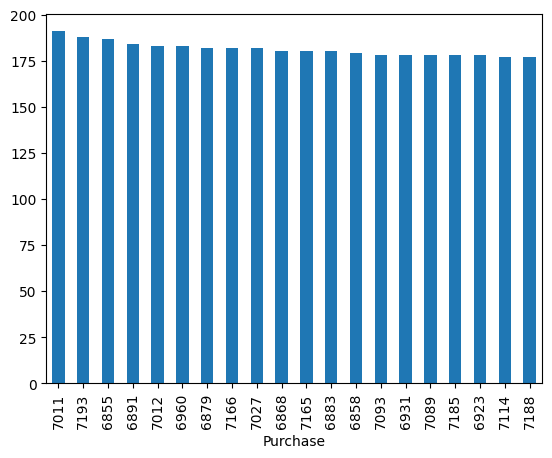

In [ ]:
# Purchase column

df['Purchase'].value_counts().head(20).plot(kind='bar')

<Axes: xlabel='Purchase', ylabel='count'>

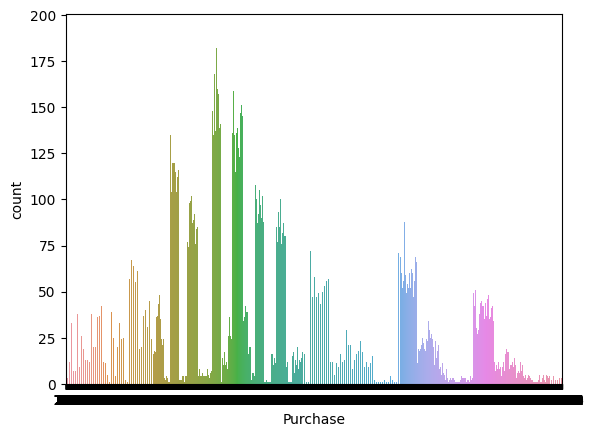

In [ ]:
#SNS
sns.countplot(x='Purchase', data=df)

<Axes: xlabel='City_Category'>

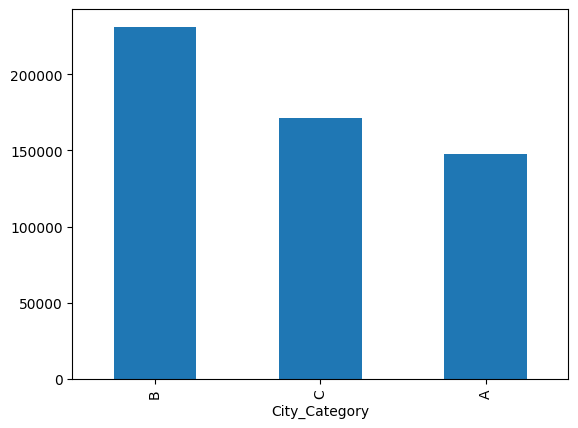

In [ ]:
## City_Category Column
df['City_Category'].value_counts().plot(kind='bar')


<Axes: xlabel='City_Category', ylabel='count'>

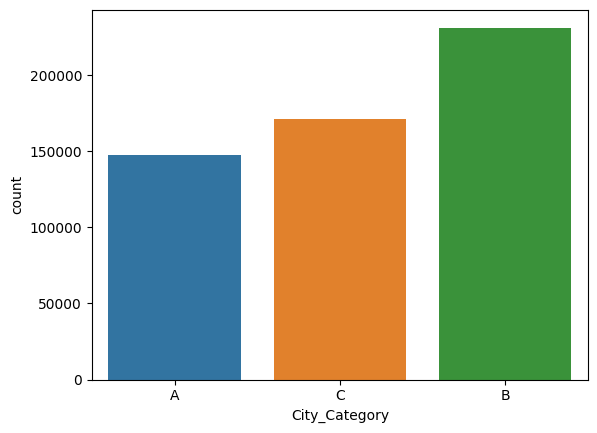

In [ ]:
#SNS

sns.countplot(x = 'City_Category',data=df)

<Axes: xlabel='Stay_In_Current_City_Years'>

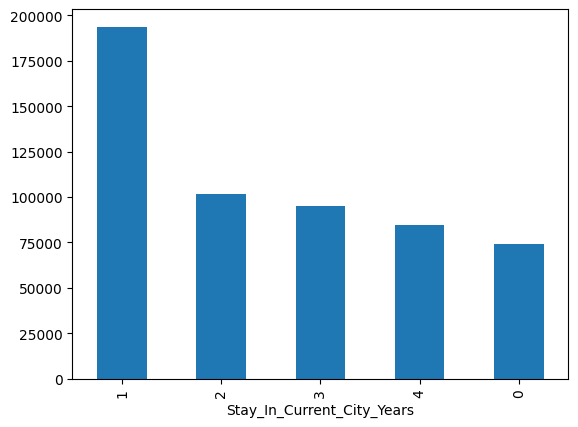

In [ ]:
# Stay_In_Current_City_Years	 columns

df['Stay_In_Current_City_Years'].value_counts().plot(kind='bar')

In [ ]:
##SNS


<Axes: xlabel='Occupation'>

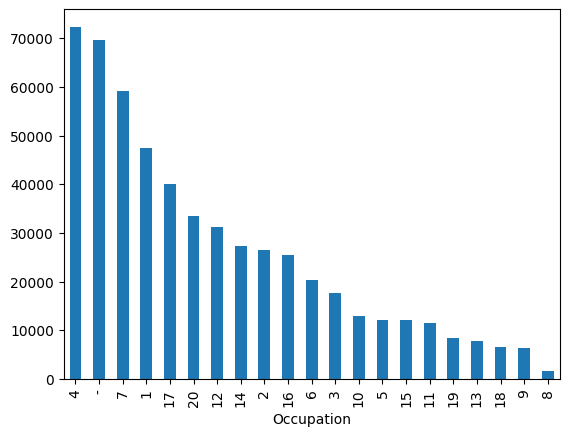

In [ ]:
# Occupation column

df['Occupation'].value_counts().plot(kind='bar')

## Age vs Purchased


Text(0, 0.5, 'Purchase')

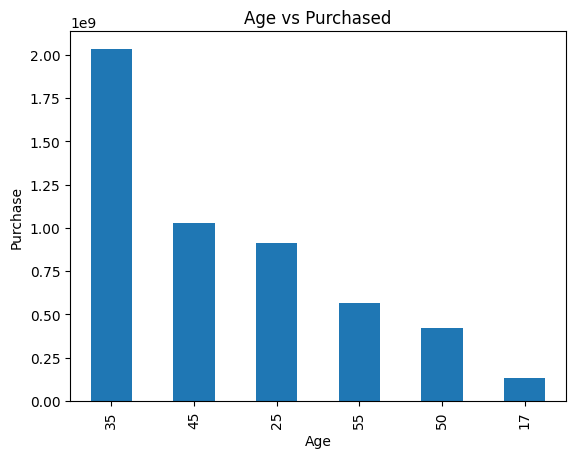

In [ ]:

df.groupby('Age')['Purchase'].sum().sort_values(ascending = False).plot(kind='bar')
plt.title('Age vs Purchased')
plt.ylabel('Purchase')

In [ ]:
#SNS

## Occupation vs Purchased


Text(0.5, 1.0, 'Occupation vs Purchased')

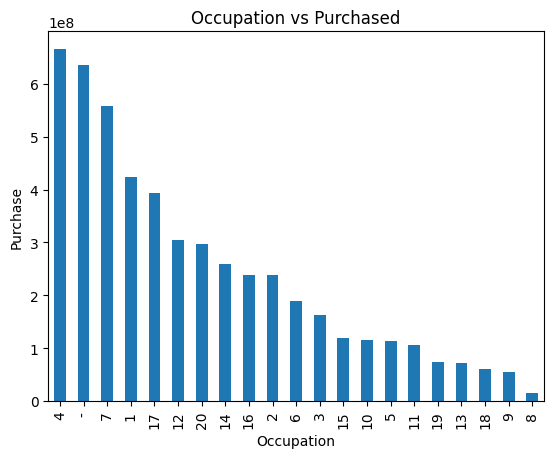

In [ ]:
df.groupby('Occupation')['Purchase'].sum().sort_values(ascending = False).plot(kind='bar')
plt.ylabel('Purchase')
plt.title('Occupation vs Purchased')

In [ ]:
#SNS

## Product_category_1 vs Purchased


Text(0, 0.5, 'Product_Category_1')

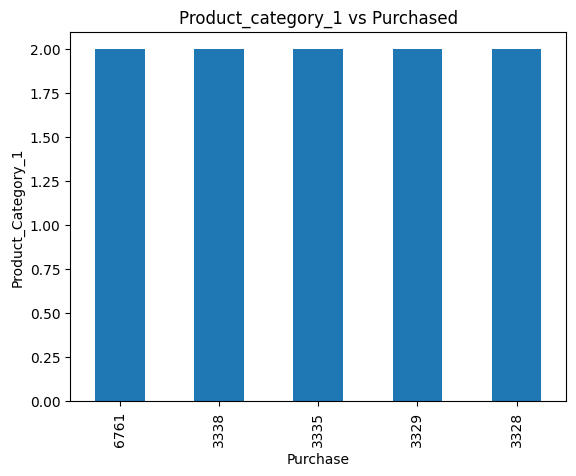

In [ ]:
df.groupby('Purchase')['Product_Category_1'].sum().sort_values(ascending=True).head().plot(kind='bar')
plt.title('Product_category_1 vs Purchased')
plt.ylabel('Product_Category_1')

In [ ]:
#SNS

## Product_category_2 vs Purchased


Text(0, 0.5, 'Purchase')

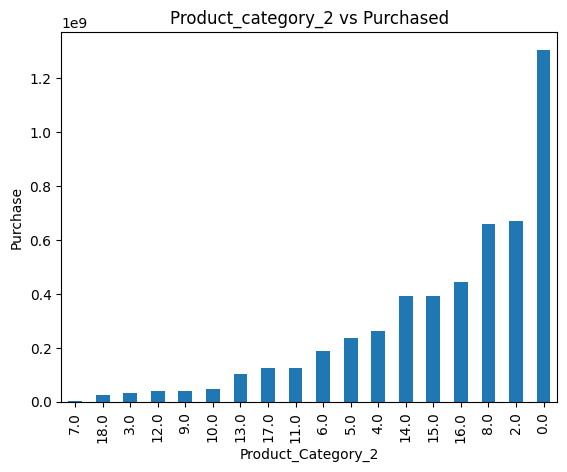

In [ ]:
df.groupby('Product_Category_2')['Purchase'].sum().sort_values(ascending=True).plot(kind='bar')
plt.title('Product_category_2 vs Purchased')
plt.ylabel('Purchase')

## Product_category_3 vs Purchased


Text(0, 0.5, 'Purchase')

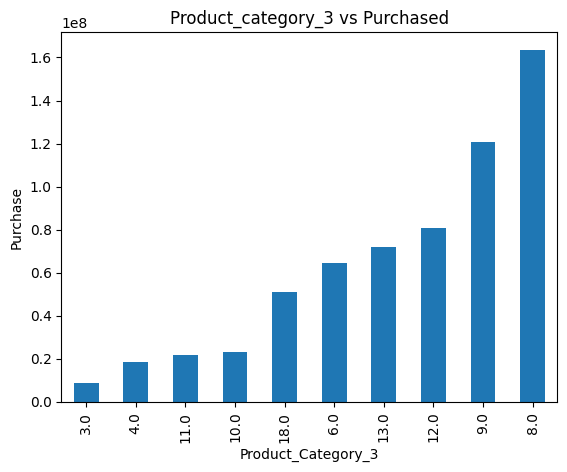

In [ ]:
df.groupby('Product_Category_3')['Purchase'].sum().sort_values(ascending=True).head(10).plot(kind='bar')
plt.title('Product_category_3 vs Purchased')
plt.ylabel('Purchase')

## City category pie chart


([<matplotlib.patches.Wedge at 0x7d0c02795a80>,
 [Text(0.27267989579948126, 1.0656667745720443, 'B'),
  Text(-0.9774040218269879, -0.5046596656326213, 'C'),
  Text(0.7311976184733743, -0.8217968378734892, 'A')],
 [Text(0.14873448861789884, 0.5812727861302059, '42.03'),
  Text(-0.5331294664510843, -0.27526890852688435, '31.12'),
  Text(0.3988350646218405, -0.4482528206582668, '26.85')])

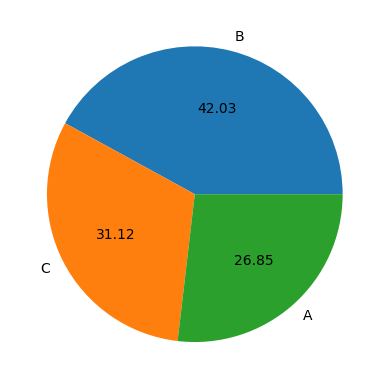

In [ ]:
a = df['City_Category'].value_counts()
plt.pie(a, labels=a.index,autopct='%.2f')